In [307]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio

In [308]:
df_companies = pd.read_csv("sp500_companies.csv")

In [312]:
df_companies.head()

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,227.55,3459693150208,1.317810e+11,0.049,Cupertino,CA,United States,161000.0,"Apple Inc. designs, manufactures, and markets ...",0.063900
1,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,134.80,3306644045824,6.118400e+10,1.224,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.061073
2,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,416.32,3094523150336,1.294330e+11,0.152,Redmond,WA,United States,228000.0,Microsoft Corporation develops and supports so...,0.057156
3,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,164.52,2017788428288,1.154780e+11,0.136,Mountain View,CA,United States,179582.0,Alphabet Inc. offers various products and plat...,0.037268
4,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,163.24,2015671222272,1.154780e+11,0.136,Mountain View,CA,United States,179582.0,Alphabet Inc. offers various products and plat...,0.037229


In [314]:
df_companies.shape

(503, 16)

In [315]:
df_companies.columns

Index(['Exchange', 'Symbol', 'Shortname', 'Longname', 'Sector', 'Industry',
       'Currentprice', 'Marketcap', 'Ebitda', 'Revenuegrowth', 'City', 'State',
       'Country', 'Fulltimeemployees', 'Longbusinesssummary', 'Weight'],
      dtype='object')

In [316]:
df_companies.set_index('Symbol', inplace=True)

<h2>Which are the ten stocks leader in market capitalization in Standarts and Poor's 500?</h2>

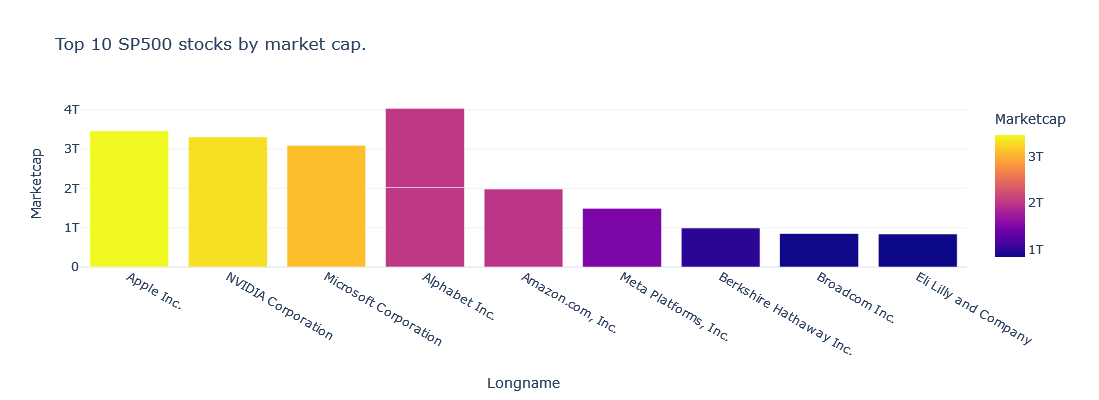

In [340]:
top10 = df_companies.sort_values('Marketcap', ascending = False ).head(10)
fig = px.bar( top10, x=top10['Longname'], y = top10['Marketcap'], 
             title='Top 10 SP500 stocks by market cap.',
             template='plotly_white', color='Marketcap', 
             height=400)
fig.update_traces(textfont_size=10, textangle=90, textposition="inside", cliponaxis=False)
fig.show()

<h2>Which are the cheapest ten stocks  in SP500?</h2>

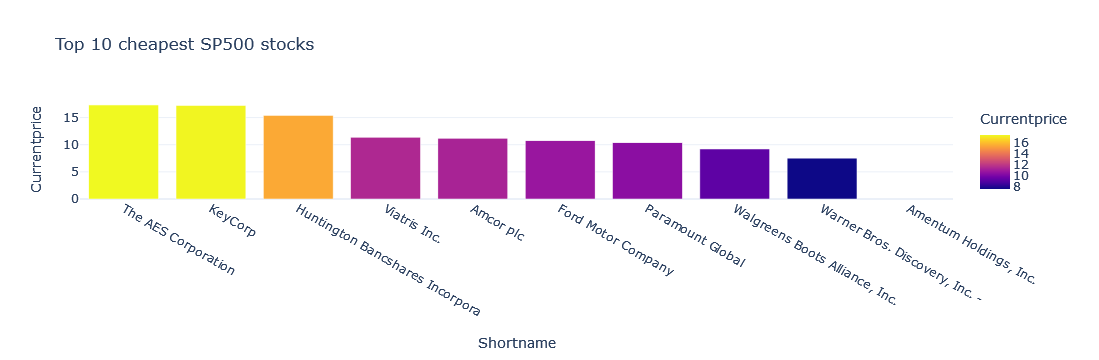

In [338]:
cheapest = df_companies.sort_values('Currentprice', ascending = False ).tail(10)
fig = px.bar( cheapest, 
             x=cheapest['Shortname'], 
             y = cheapest['Currentprice'],
             title='Top 10 cheapest SP500 stocks', 
             color='Currentprice',
            template='plotly_white')

fig.show()

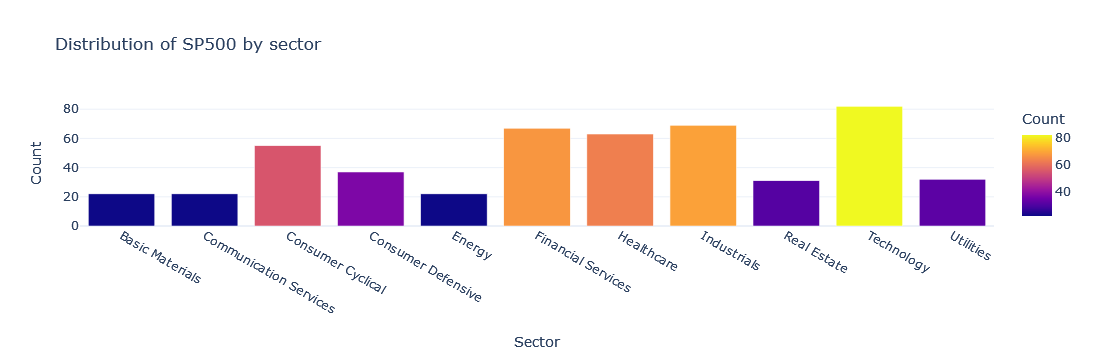

In [336]:
df_sector = df_companies.groupby('Sector')['Longname'].count().reset_index()
df_sector.columns = ['Sector','Count']  #rename for clarity
fig = px.bar(df_sector, 
             y='Count', 
             x='Sector',
             color='Count',
             title='Distribution of SP500 by sector', 
            template='plotly_white')
fig.update_traces(textfont_size=14, textangle=90, textposition="outside", cliponaxis=False)
fig.show()

In [322]:
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

<h2>Top ten grossing stocks in SP500?</h2>

In [324]:
most_growth = df_companies.sort_values('Revenuegrowth', ascending=False).head(5)
most_growth

,Exchange,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
Symbol,,,,,,,,,,,,,,,
SMCI,NMS,"Super Micro Computer, Inc.","Super Micro Computer, Inc.",Technology,Computer Hardware,47.80,27990005760,1.304591e+09,1.430,San Jose,CA,United States,NaN,"Super Micro Computer, Inc., together with its ...",0.000517
NVDA,NMS,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,134.80,3306644045824,6.118400e+10,1.224,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.061073
MU,NMS,"Micron Technology, Inc.","Micron Technology, Inc.",Technology,Semiconductors,106.92,118546472960,8.944000e+09,0.933,Boise,ID,United States,48000.0,"Micron Technology, Inc. designs, develops, man...",0.002190
NEM,NYQ,Newmont Corporation,Newmont Corporation,Basic Materials,Gold,54.30,62305447936,4.804000e+09,0.641,Denver,CO,United States,21700.0,Newmont Corporation engages in the production ...,0.001151
EXR,NYQ,Extra Space Storage Inc,Extra Space Storage Inc.,Real Estate,REIT - Industrial,170.54,37612597248,2.193653e+09,0.578,Salt Lake City,UT,United States,7618.0,"Extra Space Storage Inc., headquartered in Sal...",0.000695
